In [1]:
# importar bibliotecas:
import pandas as pd
import seaborn as sns
import sklearn as sk
import numpy as np
import pickle as pkl
import joblib as jb
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score

### Preparando Dataframe:

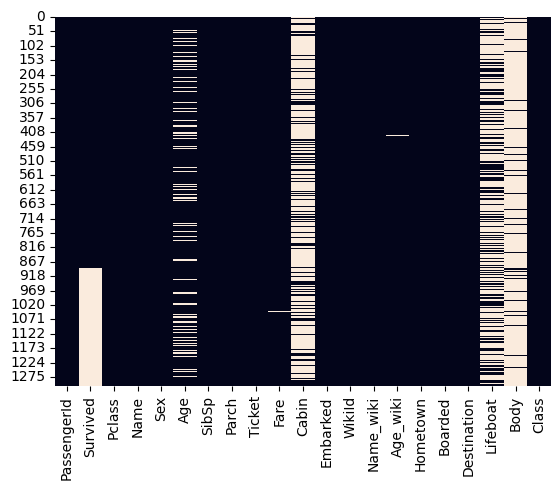

In [2]:
# ler dados:
data = pd.read_csv("../dataset/data.csv")

# checar dados:
data.isnull().sum()
sns.heatmap(data.isnull(), cbar=False);

In [3]:
# checar categorias:
data.nunique()

PassengerId    1309
Survived          2
Pclass            3
Name           1307
Sex               2
Age              98
SibSp             7
Parch             8
Ticket          929
Fare            281
Cabin           186
Embarked          3
WikiId         1304
Name_wiki      1303
Age_wiki         78
Hometown        566
Boarded           4
Destination     291
Lifeboat         24
Body            130
Class             3
dtype: int64

In [4]:
# adicionar novas colunas de features:
data['Family'] = data['SibSp'] + data['Parch']
data['IsAlone'] = data['Family'] == 0

In [5]:
# dividir em categorias de acordo com a tarifa:
data['Fare_Category'] = pd.cut(data['Fare'], bins=[0,7.90,14.45,31.28,120], labels=['Low','Mid','High_Mid','High']) 

In [6]:
data.Embarked.fillna(data.Embarked.mode()[0], inplace = True) # substituir valores nulos da coluna 'Embarked' pela moda

In [7]:
data.Cabin = data.Cabin.fillna('NA') # substituir valores nulos da coluna 'Cabin' por 'NA' criando uma nova categoria

In [8]:
data['Salutation'] = data.Name.apply(lambda name: name.split(',')[1].split('.')[0].strip()) # extrair cumprimentos dos nomes e criar uma nova coluna
grp = data.groupby(['Sex', 'Pclass']) # agrupar por sexo e classe
grp.Age.apply(lambda x: x.fillna(x.median())) # substituir valores nulos da coluna 'Age' pela mediana de cada grupo
data.Age.fillna(data.Age.median, inplace = True) # substituir valores nulos da coluna 'Age' pela mediana

In [9]:
 # transformar valores categóricos em numéricos:
data['Sex'] = LabelEncoder().fit_transform(data['Sex'])
pd.get_dummies(data.Embarked, prefix="Emb", drop_first = True);

In [10]:
# remover colunas desnecessárias para o modelo:
data.drop(['Name', 'Cabin', 'Fare_Category', 'Salutation', 'Ticket','Embarked', 'SibSp', 'Parch', 'WikiId', 'Name_wiki', 'Age_wiki', 'Boarded', 'Destination', 'Class', 'Lifeboat', 'Body', 'Hometown', 'PassengerId'], axis=1, inplace=True)

In [11]:
display(data.dtypes)

Survived    float64
Pclass        int64
Sex           int64
Age          object
Fare        float64
Family        int64
IsAlone        bool
dtype: object

In [12]:
data['Fare'].fillna(0, inplace=True) # substituir valores nulos da coluna 'Fare' por 0
data['Survived'].fillna(0.0, inplace=True)  # substituir valores nulos da coluna 'Survived' por 0.0
data['Fare'] = data['Fare'].apply(np.int64) # transformar valores float em int

data['Age'] = pd.to_numeric(data['Age'], errors='coerce') # transformar valores não numéricos em nulos
mean_age = data['Age'].mean() # média de idade
data['Age'].fillna(mean_age, inplace=True) # substituir valores nulos da coluna 'Age' pela média

data['Age'] = data['Age'].astype(int) # transformar valores float em int
data['Survived'] = data['Survived'].astype(int) # transformar valores float em int
data['IsAlone'] = data['IsAlone'].astype(int) # transformar valores float em int

In [58]:
data.head(20)

,Survived,Pclass,Sex,Age,Fare,Family,IsAlone
0,0,3,1,22,7,1,0
1,1,1,0,38,71,1,0
2,1,3,0,26,7,0,1
3,1,1,0,35,53,1,0
4,0,3,1,35,8,0,1
5,0,3,1,29,8,0,1
6,0,1,1,54,51,0,1
7,0,3,1,2,21,4,0
8,1,3,0,27,11,2,0
9,1,2,0,14,30,1,0


In [14]:
# salvar dataset:
data.to_csv('../dataset/dataset.csv', index=False)

### Regressão Linear:

In [15]:
# bibliotecas para regressão linear:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import *
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.linear_model import LinearRegression

In [16]:
# variáveis independentes:
X = data[['Pclass','Sex', 'Age', 'Fare', 'Family', 'IsAlone']]
# variável dependente:
y = data['Survived']

# dividir dados em treino e teste:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
# criar modelo de regressão linear:
lr = LinearRegression()
# treinar modelo:
lr.fit(X_train, y_train);

In [18]:
prediction = lr.predict(X_test)
prediction_lr = np.where(prediction >= 0.5, 1, 0)
acc = accuracy_score(y_test, prediction_lr) # calcular a acurácia
print(f"Acurácia da LR: {acc:.5f}")

Acurácia da LR: 0.77099


In [21]:
comparing = pd.DataFrame({'Actual': y_test, 'Predicted': prediction}) # comparar valores reais com preditos
comparing.head()

,Actual,Predicted
1148,0,0.061205
1049,0,0.224703
982,0,0.057065
808,0,0.126393
1195,0,0.388212


In [22]:
mae = mean_absolute_error(comparing['Actual'], comparing['Predicted']) # erro absoluto médio
mse = mean_squared_error(comparing['Actual'], comparing['Predicted'])  # erro quadrático médio
print(f"Mean Absolute Error (MAE): {mae: .5f}")
print(f"Mean Squared Error (MSE): {mse: .5f}")

Mean Absolute Error (MAE):  0.31125
Mean Squared Error (MSE):  0.15862


In [97]:
entrada = []
for i in range(0, 6):
    entrada.append(float(input(f"Digite o valor da coluna {data.columns[i+1]}: ")))
pred = lr.predict(np.array(entrada).reshape(1, -1))

/home/codespace/.local/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [98]:
print(f"Probabilidade de sobrevivência de {pred[0]*100:.2f}% para os seguintes atributos:")
for i in range(0, 6):
    print(f"{data.columns[i+1]}: {entrada[i]}")

Probabilidade de sobrevivência de 5.50% para os seguintes atributos:
Pclass: 3.0
Sex: 1.0
Age: 30.0
Fare: 15.0
Family: 0.0
IsAlone: 1.0


### Perceptron de Camada Única:


In [34]:
from sklearn.linear_model import Perceptron

# criar uma instância do perceptron de camada única:
perceptron = Perceptron()

# treinar o modelo usando os dados de treinamento:
perceptron.fit(X_train, y_train);

In [35]:
perceptron_prediction = perceptron.predict(X_test) # prever os valores de y para os dados de teste

In [36]:
acc = accuracy_score(y_test, perceptron_prediction) # calcular a acurácia
print(f"Acurácia do Perceptron: {acc:.5f}")

Acurácia do Perceptron: 0.63359


In [37]:
comparing_perceptron = pd.DataFrame({'Actual': y_test, 'Predicted': perceptron_prediction}) # comparar valores reais com valores previstos

In [38]:
comparing_perceptron.head()

,Actual,Predicted
1148,0,0
1049,0,1
982,0,0
808,0,0
1195,0,1


In [39]:
mae = mean_absolute_error(comparing_perceptron['Actual'], comparing_perceptron['Predicted']) # erro absoluto médio
mse = mean_squared_error(comparing_perceptron['Actual'], comparing_perceptron['Predicted'])  # erro quadrático médio
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")

Mean Absolute Error (MAE): 0.366412213740458
Mean Squared Error (MSE): 0.366412213740458


In [40]:
# salvar o modelo em um arquivo:
with open('../models/model_perceptron.pkl', 'wb') as file:
    pkl.dump(lr, file)

### Perceptron Multicamadas:

In [102]:
from sklearn.neural_network import MLPClassifier

# criar uma instância do perceptron de multicamadas:
mlp = MLPClassifier(hidden_layer_sizes=(5, 5), max_iter=10000, activation='logistic')

# treinar o modelo usando os dados de treinamento:
mlp.fit(X_train, y_train);

In [103]:
mlp_prediction = mlp.predict(X_test) # prever os valores de y para os dados de teste

In [104]:
acc = accuracy_score(y_test, mlp_prediction) # calcular a acurácia
print(f"Acurácia do MLP: {acc:.5f}")

Acurácia do MLP: 0.75954


In [44]:
comparing_mlp = pd.DataFrame({'Actual': y_test, 'Predicted': mlp_prediction}) # comparar valores reais com valores previstos

In [45]:
comparing_mlp.head()

,Actual,Predicted
1148,0,0
1049,0,0
982,0,0
808,0,0
1195,0,0


In [46]:
mae = mean_absolute_error(comparing_mlp['Actual'], comparing_mlp['Predicted']) # erro absoluto médio
mse = mean_squared_error(comparing_mlp['Actual'], comparing_mlp['Predicted'])  # erro quadrático médio
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")

Mean Absolute Error (MAE): 0.26717557251908397
Mean Squared Error (MSE): 0.26717557251908397


In [47]:
# salvar o modelo em um arquivo:
with open('../models/model_mlp.pkl', 'wb') as file:
    pkl.dump(lr, file)

### Predição:

In [ ]:
entrada = np.array([[0,1,25,5,0,0]])
res = perceptron.predict(pd.DataFrame(entrada))
print(res)

In [ ]:
entrada = np.array([[0,1,25,5,0,0]])
res = mlp.predict(pd.DataFrame(entrada))
print(res)

In [ ]:
entrada = np.array([[1,1,30,10,5,0]])
res = lr.predict(pd.DataFrame(entrada))
print(res)